### Load the Dataset

In [68]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer(as_frame=True)

# Print description of the breast cancer dataset
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Checking the Sample and Target Sizes
- These tables should both have 569 rows

In [69]:
# Check sample size (number of rows and columns per row/sample)
print("Sample size:")
print(breast_cancer.data.shape)

# Check target size
print("\nTarget size:")
print(breast_cancer.target.shape)

Sample size:
(569, 30)

Target size:
(569,)


### Splitting the Data for Training and Testing
- Shuffles the data and splits the sample and target data into training and testing sets using ``train_test_split`` from ``sklearn.model_selection``

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

### Training and Testing Set Sizes
- We will use the default 75/25 split for training and testing set sizes.

In [71]:
print("Sample set sizes:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

print("\nTarget set sizes:")
print(f"Training set: {y_train.shape}")
print(f"Testing set: {y_test.shape}")

Sample set sizes:
Training set: (426, 30)
Testing set: (143, 30)

Target set sizes:
Training set: (426,)
Testing set: (143,)


### Creating the Model (GaussianNB)
- We will use the GaussianNB estimator from the ``sklearn.naive_bayes`` library, instead of the KNeighborsClassifier estimator.

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### Training the Model

In [73]:
gnb.fit(X=X_train, y=y_train)

GaussianNB()

### Predicting

In [74]:
predicted = gnb.predict(X=X_test)
expected = y_test

#print(predicted[::20])
#print(expected[::20])

### Estimator Method Score

In [75]:
print(f"Accuracy Score: {gnb.score(X_test, y_test):.2%}")

Accuracy Score: 95.10%


### Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[44  6]
 [ 1 92]]


### Classification Report

In [77]:
from sklearn.metrics import classification_report

names = [str(tumor_type) for tumor_type in breast_cancer.target_names]
report = classification_report(expected, predicted, target_names=names)

print(report)

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



### Visualizing the Confusion Matrix

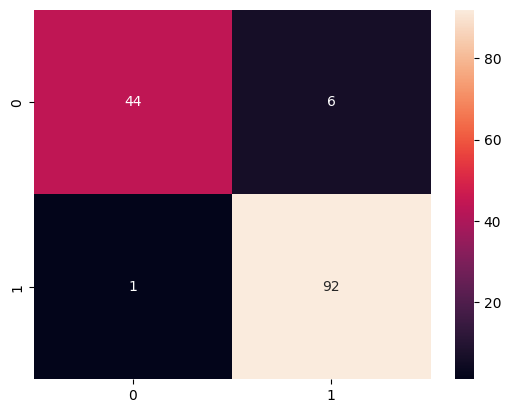

In [78]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True)

### K-Fold Cross Validation

In [79]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

#### Using the KFold Object with Function cross_val_score

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=gnb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print("Scores: ")
print(scores)
print(f'\nMean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Scores: 
[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]

Mean accuracy: 93.85%
Accuracy standard deviation: 2.75%


### Running Multiple Models to Find the Best One

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
  'GaussianNB': gnb,
  'KNeighborsClassifier': KNeighborsClassifier(),
  'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
  'SVC': SVC(gamma='scale')
}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

  print(f"{estimator_name:>20} " +
        f"mean accuracy={scores.mean():.2%}; " +
        f"standard deviation={scores.std():.2%}")

          GaussianNB mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression mean accuracy=95.08%; standard deviation=3.02%
                 SVC mean accuracy=91.92%; standard deviation=3.52%
